Feature Selection Using Decision Tree/Random Forest

First we will do this for the regular crime data (no three year gap between features and crime rate) and then we will do it for the three year gap data.

Note: Here C_Rate values are 0 = very low, 1 = low, 2 = medium, 3 = high and 4 = very high

In [1]:
import pandas as pd
import time


In [2]:
Data_1 = pd.read_csv('/Users/alyzehjiwani/Downloads/Data/Final Data Used/SMOTE_data.csv')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
start = time.process_time()

In [5]:
Data_1.columns.values

array(['Unnamed: 0', 'Year', 'N_ID', 'Pop', 'Ad_Ed', 'Child_Care',
       'Com_House', 'Emp_Res', 'Sub_Trt', 'Trans_House', 'Recreation',
       'Inflation', 'NIA', 'C_Rate'], dtype=object)

In [6]:
Data_1 = Data_1.drop('Unnamed: 0',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(Data_1.drop('C_Rate',axis=1), Data_1['C_Rate'], test_size=.3,random_state=22)



In [7]:
X_train.shape, X_test.shape

((1176, 12), (504, 12))

In [8]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf=5)




In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [10]:
import io
from io import StringIO
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.metrics import classification_report, accuracy_score
from pydot import graph_from_dot_data

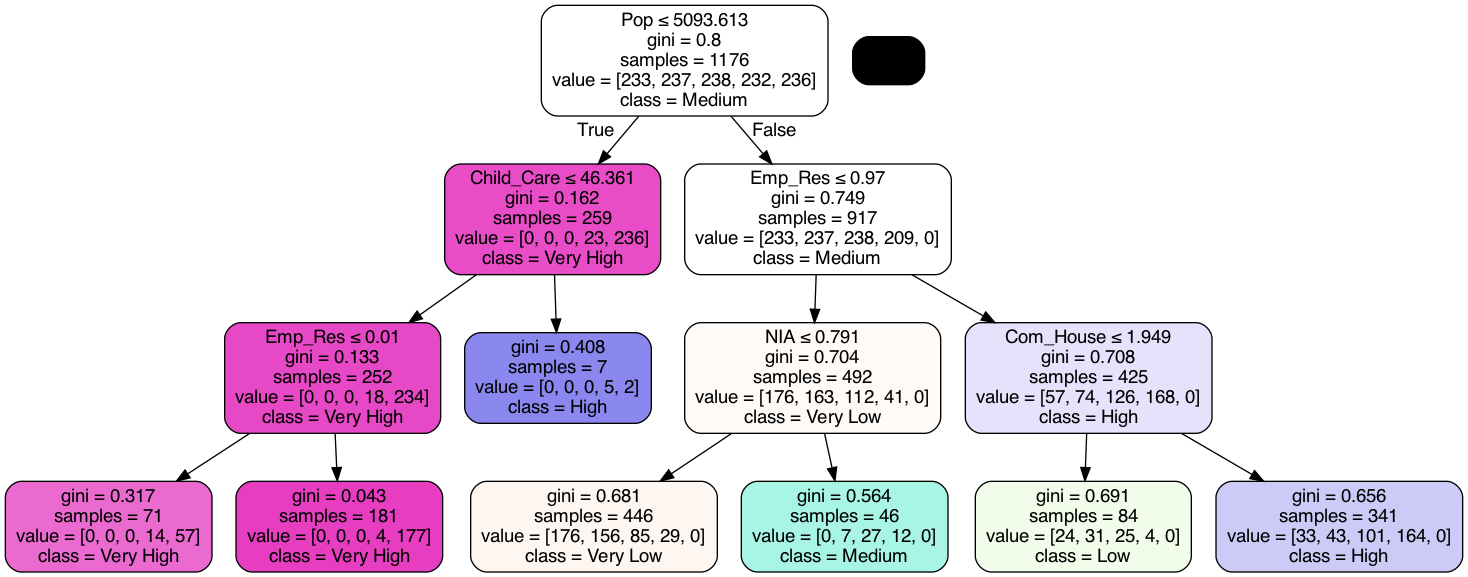

In [11]:
xvar = Data_1.drop('C_Rate', axis = 1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph,)= graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [12]:
#runtime for model
t1 = time.process_time() - start
print(t1)

0.3982890000000001


Population appears to be the most important feature here

In [13]:
predictions = model.predict(X_test)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print ("Decision Tree Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Decision Tree Train Accuracy: 0.5416666666666666
Decision Tree Test Accuracy: 0.5535714285714286


In [14]:
print(classification_report(y_test,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.41      0.83      0.55       103
           1       0.45      0.15      0.23        99
           2       0.50      0.08      0.14        98
           3       0.51      0.69      0.59       104
           4       0.93      0.99      0.96       100

    accuracy                           0.55       504
   macro avg       0.56      0.55      0.49       504
weighted avg       0.56      0.55      0.50       504



Our values here are much higher than our values using the original data

We will now use permutation feature importance to further evaluate the importance of our features

In [15]:
model.score(X_test,y_test)

0.5535714285714286

In [16]:
from sklearn.inspection import permutation_importance

running permutation importance on our test set:

In [17]:
r = permutation_importance(model, X_test, y_test, n_repeats = 30, random_state = 0)

In [18]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{list(Data_1.columns.values)[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Pop     0.228 +/- 0.011
Emp_Res 0.096 +/- 0.016
Com_House0.053 +/- 0.008
NIA     0.025 +/- 0.010
Child_Care0.011 +/- 0.004


running it on our train set:

In [19]:
r_1 = permutation_importance(model, X_train, y_train, n_repeats = 30, random_state = 0)


In [20]:
#runtime for model
t2 = time.process_time() -t1
print(t2)

4.335967


In [21]:
for i in r_1.importances_mean.argsort()[::-1]:
    if r_1.importances_mean[i] - 2 * r_1.importances_std[i] > 0:
        print(f"{list(Data_1.columns.values)[i]:<8}"
              f"{r_1.importances_mean[i]:.3f}"
              f" +/- {r_1.importances_std[i]:.3f}")

Pop     0.231 +/- 0.011
Emp_Res 0.087 +/- 0.009
Com_House0.049 +/- 0.005
NIA     0.033 +/- 0.005
Child_Care0.011 +/- 0.003


Lets see how our model score changes keeping only the most "important" features.
We will start by only keeping pop,emp_res,and com_house

In [22]:
train_1 = X_train.drop(['Year', 'N_ID', 'Ad_Ed','Sub_Trt', 'Trans_House','Recreation','Inflation','NIA','Child_Care'], axis = 1)
test_1 = X_test.drop(['Year', 'N_ID', 'Ad_Ed','Sub_Trt', 'Trans_House','Recreation','Inflation','NIA','Child_Care'], axis = 1)

In [23]:
Data_1.columns.values

array(['Year', 'N_ID', 'Pop', 'Ad_Ed', 'Child_Care', 'Com_House',
       'Emp_Res', 'Sub_Trt', 'Trans_House', 'Recreation', 'Inflation',
       'NIA', 'C_Rate'], dtype=object)

In [24]:
model_1 = DecisionTreeClassifier(criterion = 'gini', random_state = 100,max_depth = 3,  min_samples_leaf=5)



In [25]:
model_1.fit(train_1, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

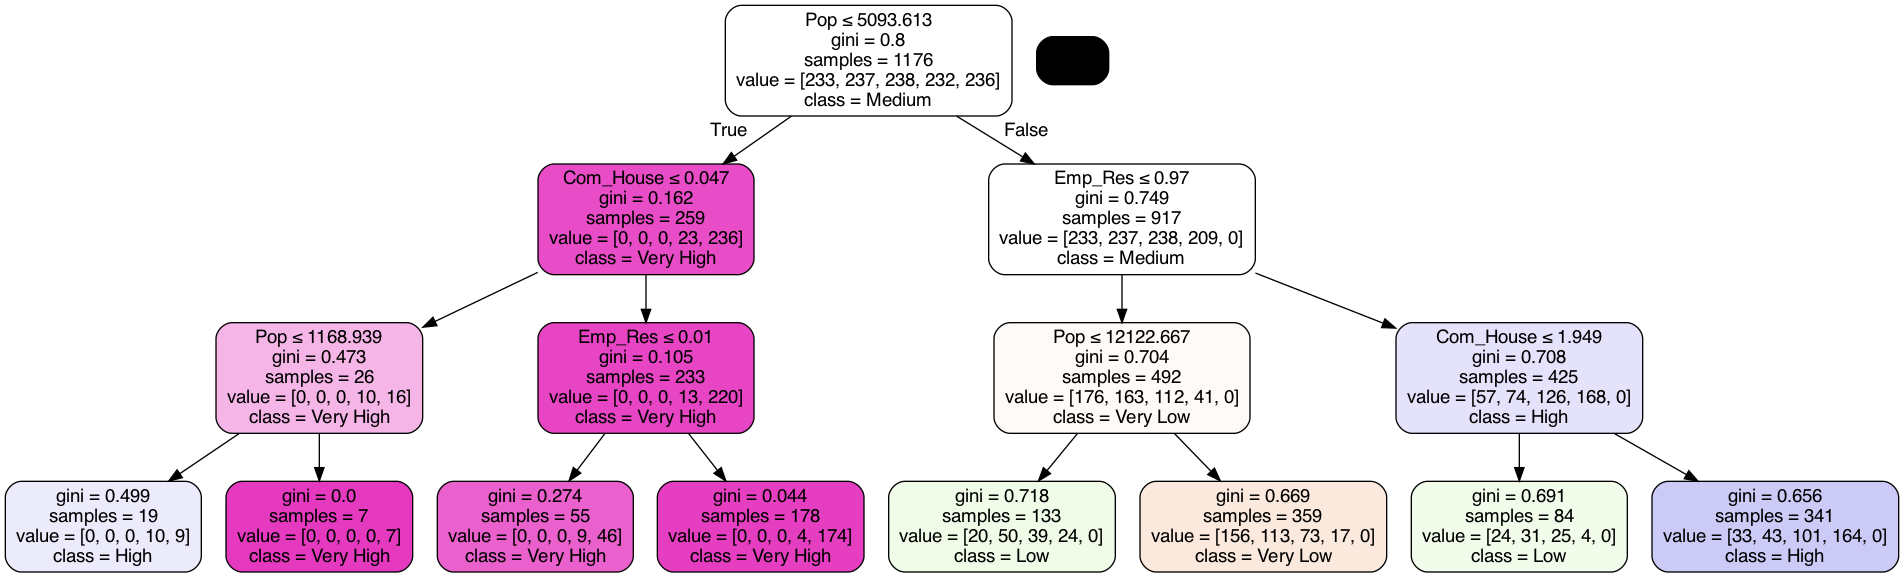

In [26]:
xvar_1 = Data_1.drop(['Year', 'N_ID', 'Ad_Ed','Child_Care','Sub_Trt', 'Trans_House','Recreation','Inflation','NIA','C_Rate'], axis = 1)
feature_cols_1 = xvar_1.columns
dot_data_1 = StringIO()
export_graphviz(model_1, out_file = dot_data_1, filled = True, rounded = True, special_characters = True, feature_names = feature_cols_1, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph_1,)= graph_from_dot_data(dot_data_1.getvalue())
Image(graph_1.create_png())



In [27]:
predictions = model_1.predict(test_1)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model_1.predict(train_1)))
print ("Decision Tree Test Accuracy:", accuracy_score(y_test, model_1.predict(test_1)))

Decision Tree Train Accuracy: 0.5425170068027211
Decision Tree Test Accuracy: 0.5555555555555556


In [28]:
#runtime for model
t3 = time.process_time() - t2
print(t3)

0.6057559999999995


we will add in NIA

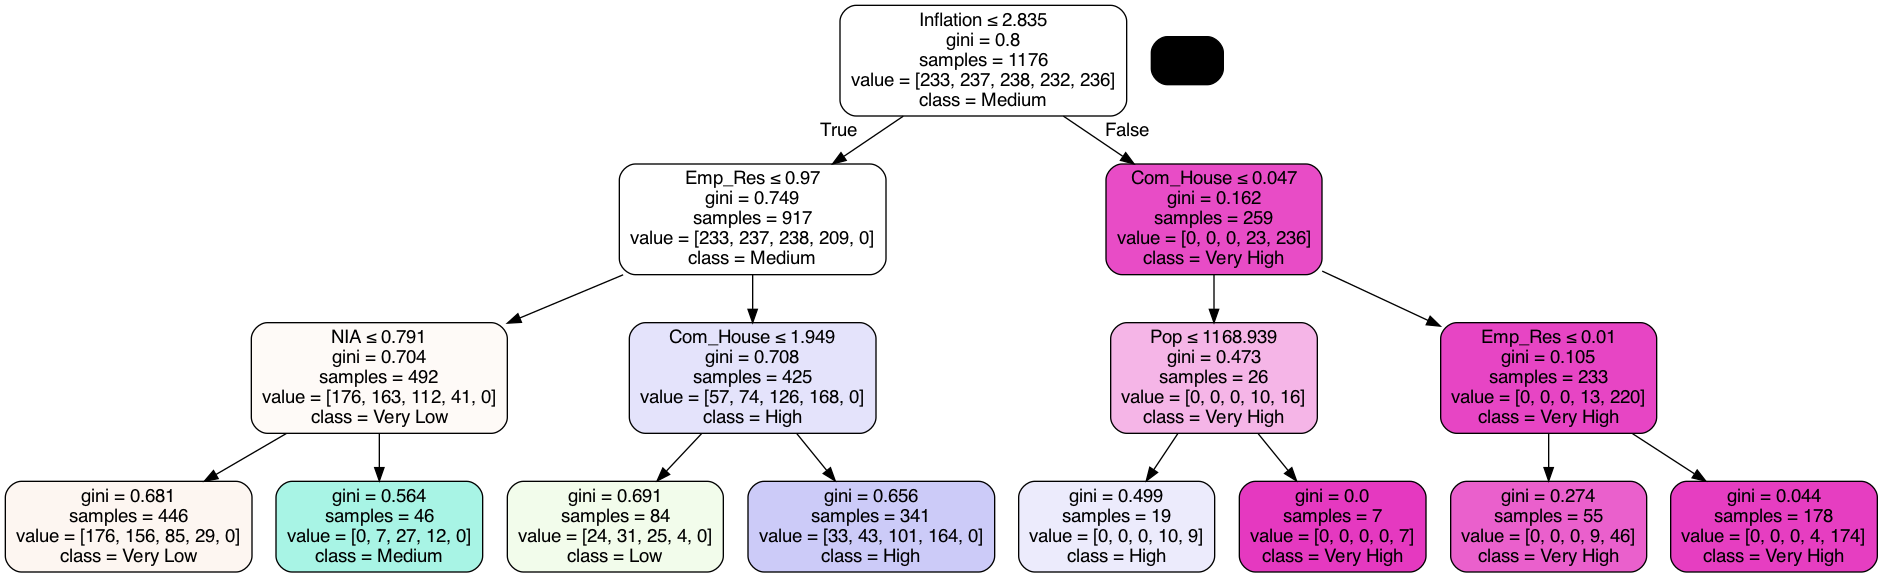

In [29]:
train_2 = X_train.drop(['Year', 'N_ID', 'Ad_Ed','Child_Care','Sub_Trt', 'Trans_House','Recreation'], axis = 1)
test_2 = X_test.drop(['Year', 'N_ID', 'Ad_Ed','Child_Care','Sub_Trt', 'Trans_House','Recreation'], axis = 1)

model_2 = DecisionTreeClassifier(criterion = 'gini', random_state = 100,max_depth = 3,  min_samples_leaf=5)

model_2.fit(train_2, y_train)

xvar_2 = Data_1.drop(['Year', 'N_ID', 'Ad_Ed','Child_Care','Sub_Trt', 'Trans_House','Recreation','C_Rate'], axis = 1)
feature_cols_2 = xvar_2.columns

dot_data_2 = StringIO()
export_graphviz(model_2, out_file = dot_data_2, filled = True, rounded = True, special_characters = True, feature_names = feature_cols_2, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph_2,)= graph_from_dot_data(dot_data_2.getvalue())
Image(graph_2.create_png())

In [30]:
predictions = model_2.predict(test_2)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model_2.predict(train_2)))
print ("Decision Tree Test Accuracy:", accuracy_score(y_test, model_2.predict(test_2)))

Decision Tree Train Accuracy: 0.5399659863945578
Decision Tree Test Accuracy: 0.5476190476190477


In [31]:
#runtime for model
t4 = time.process_time() - t3
print(t4)

4.486612


Our Accuracy reduced, so we will remove NIA and add in Child Care

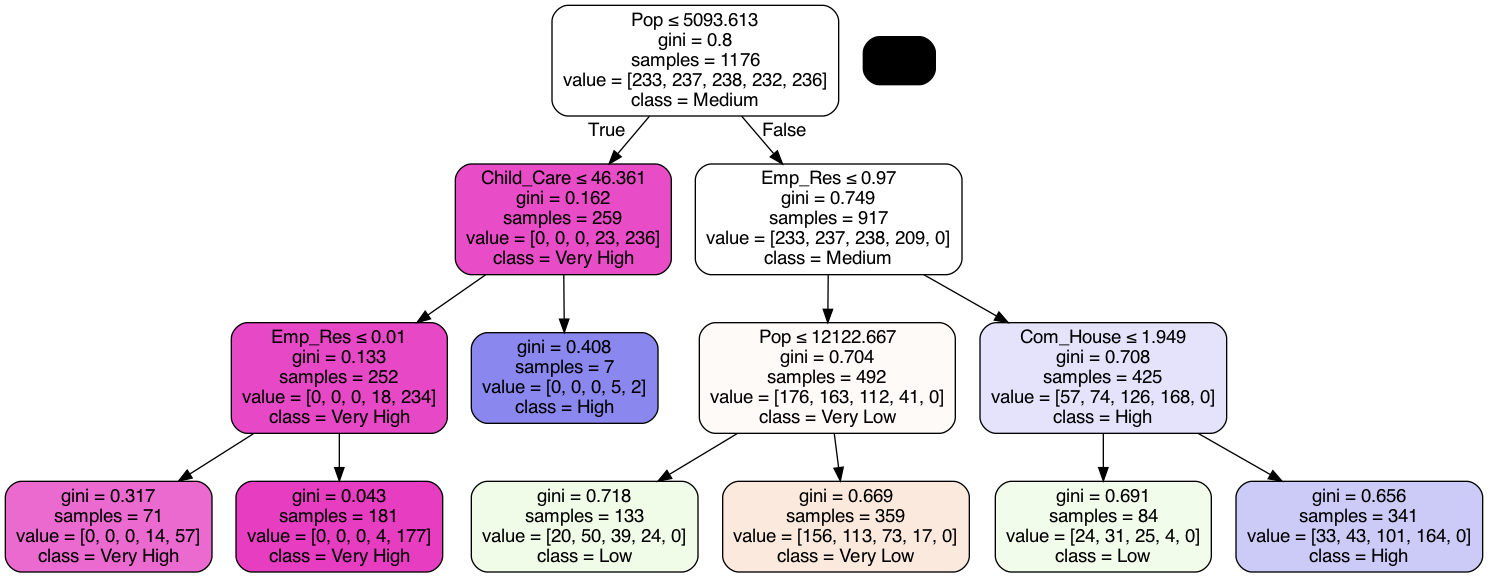

In [32]:
train_3 = X_train.drop(['Year', 'N_ID', 'Inflation','Sub_Trt', 'Trans_House','Recreation','NIA'], axis = 1)
test_3 = X_test.drop(['Year', 'N_ID', 'Inflation','Sub_Trt', 'Trans_House','Recreation','NIA'], axis = 1)

model_3 = DecisionTreeClassifier(criterion = 'gini', random_state = 100,max_depth = 3,  min_samples_leaf=5)

model_3.fit(train_3, y_train)

xvar_3 = Data_1.drop(['Year', 'N_ID', 'Inflation','Sub_Trt', 'Trans_House','Recreation','NIA','C_Rate'], axis = 1)
feature_cols_3 = xvar_3.columns
dot_data_3 = StringIO()
export_graphviz(model_3, out_file = dot_data_3, filled = True, rounded = True, special_characters = True, feature_names = feature_cols_3, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph_3,)= graph_from_dot_data(dot_data_3.getvalue())
Image(graph_3.create_png())

In [33]:
predictions = model_3.predict(test_3)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model_3.predict(train_3)))
print ("Decision Tree Test Accuracy:", accuracy_score(y_test, model_3.predict(test_3)))

Decision Tree Train Accuracy: 0.54421768707483
Decision Tree Test Accuracy: 0.5615079365079365


In [34]:
#runtime for model
t5 = time.process_time() - t4
print(t5)

0.7906279999999999


According to our results, Com_House, Child_Care, Emp_Res and Pop appear to be the most importnat features for this model